In [17]:
import MDAnalysis as mda
import numpy as np
from mdcraft.analysis.profile import DensityProfile
from matplotlib import pyplot as plt
import os

rcParams = plt.matplotlib.rcParams

WIDTH = 1.5 * 8.3 / 2.54
DOUBLE_WIDTH = 1.5 * 17.1 / 2.54
DPI = 150
rcParams['axes.labelsize']= 14
rcParams['axes.xmargin']= 0
rcParams['axes.ymargin']= .1
rcParams['lines.markersize']= 5
rcParams['figure.dpi']= DPI
rcParams['figure.autolayout']= True
rcParams['figure.figsize']= (WIDTH, 3 * WIDTH / 4)
rcParams['figure.facecolor']= 'white'
rcParams['font.size']= 12
rcParams['grid.color']= '0'
rcParams['grid.linestyle']= '-'
rcParams['legend.edgecolor']= '1'
rcParams['legend.fontsize']= 10
rcParams['xtick.labelsize']= 12
rcParams['ytick.labelsize']= 12
rcParams['xtick.direction']= 'in'
rcParams['ytick.direction']= 'in'
rcParams['font.family']= 'sans-serif'
rcParams['font.sans-serif']= ['Helvetica']
rcParams['text.usetex']=False
# Create color wheel
rcParams['axes.prop_cycle'] = plt.matplotlib.cycler(color=['#4063D8','#009B72','#FFB400','#D80032','#9558B2','#808080'])

# Load Trajectory

poly_sequ_0.0ALPHA_nchain_400_znet_0_nsalt_0_temp_1_bulk
[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]), array([81, 82, 83, 84, 85, 86, 87, 88]), array([ 89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113]), array([114, 115, 116, 117, 118, 119, 120, 121]), array([122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
       161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
       174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 

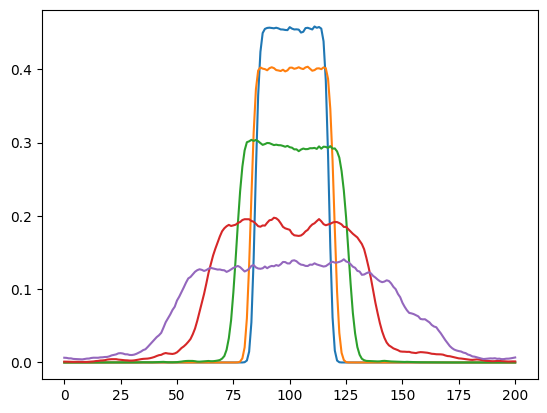

In [12]:
seqs = ['0.0ALPHA','0.2ALPHA', '0.4ALPHA','0.6ALPHA','0.8ALPHA']

rho_coacervate = np.empty((len(seqs), 2))
rho_supernatant = np.empty((len(seqs), 2))

rho_coacervate = np.empty(len(seqs))
rho_supernatant = np.empty(len(seqs))
plt.clf()
for i, seq in enumerate(seqs):
    tag = f'poly_sequ_{seq}_nchain_400_znet_0_nsalt_0_temp_1_bulk'
    print(tag)



    # Create the DensityProfile object
    if os.path.isfile('../data/'+tag+'/dens_prof.npz'):
        number_densities = np.load('../data/'+tag+'/dens_prof.npz', allow_pickle=True)['arr_0'][0]
        pass
    else:
        u = mda.Universe('../data/'+tag+'/input.data', '../data/'+tag+'/drop.lammpstrj',format='LAMMPSDUMP')
        ag = u.select_atoms('type 1 or type 2 or type 3')

        # Define the direction for the density profile
        str_direction = 'x'

        density_profile = DensityProfile(groups=ag, groupings='atoms', axes=str_direction, n_bins=201, reduced = True, verbose=True)

        # Compute the density profile
        density_profile.run(start=1001, step=10)
        np.savez('../data/'+tag+'/dens_prof',density_profile.results.number_densities['x'])
        number_densities = density_profile.results.number_densities['x'][0]
    plt.plot(number_densities)

    tol = 5e-3
    

    bulk = np.abs(np.gradient(number_densities, edge_order=2)) <= tol
    indices_cutoff = np.where(np.diff(bulk))[0] + 1
    split_bool_equal = np.split(bulk, indices_cutoff)
    split_indices = np.split(np.arange(number_densities.shape[0]), indices_cutoff)
    print(split_indices)
    rho_supernatant[i] = number_densities[np.r_[split_indices[0],split_indices[4]]].mean()
    rho_coacervate[i] = number_densities[split_indices[2]].mean()

# Retrieve the density data

In [13]:
rho_coacervate

array([0.45509483, 0.40047202, 0.29508514, 0.18614604, 0.12766191])

In [14]:
rho_coacervate


array([0.45509483, 0.40047202, 0.29508514, 0.18614604, 0.12766191])

(0.0, 0.5)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

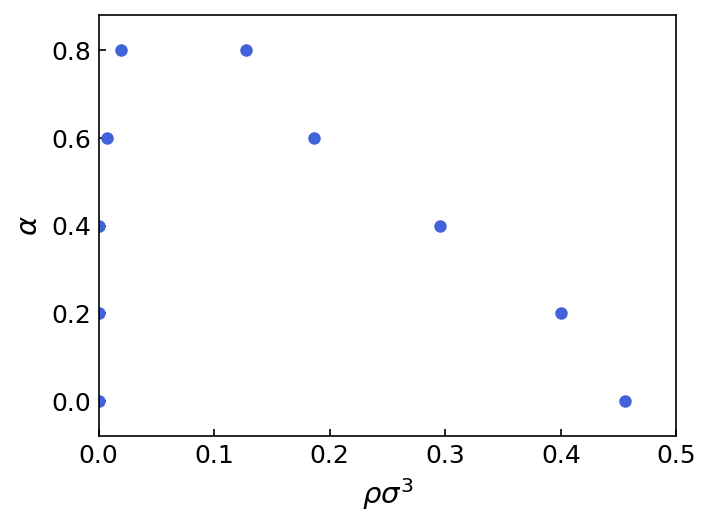

In [21]:
chi = [0.0,0.2,0.4,0.6,0.8]
plt.clf()
plt.plot(rho_coacervate,chi,'o',color="C0")
plt.plot(rho_supernatant,chi,'o',color="C0")
plt.xlabel(r'$\rho\sigma^3$')
plt.ylabel(r'$\alpha$')
plt.xlim(0,0.5)
#at 0.4 and above, can't phase split anymore so not worth running anymore


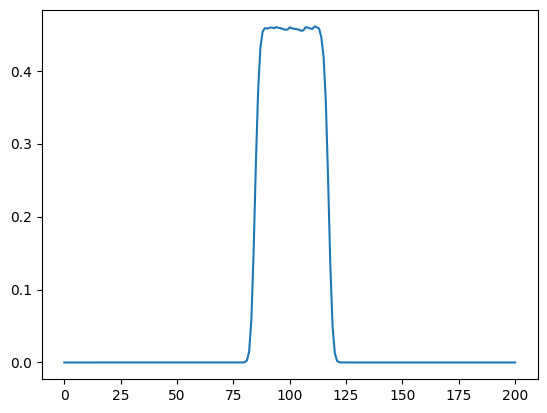

In [6]:
tag = f'poly_sequ_0.0ALPHA_nchain_400_znet_0_nsalt_0_temp_1_bulk'

number_densities = np.load('../data/'+tag+'/dens_prof.npz', allow_pickle=True)['arr_0'][0]
plt.plot(number_densities)

In [14]:
tol = 1e-3

bulk = np.abs(np.gradient(number_densities, edge_order=2)) <= tol
indices_cutoff = np.where(np.diff(bulk))[0] + 1
split_bool_equal = np.split(bulk, indices_cutoff)
split_indices = np.split(np.arange(number_densities.shape[0]), indices_cutoff)

supernatant = number_densities[np.r_[split_indices[0],split_indices[4]]].mean()
coacervate = number_densities[split_indices[2]].mean()

In [28]:
coacervate

0.230946931024531

In [29]:
supernatant

0.024348070707070707

# Density Profile

In [ ]:
gyr = Gyradius(ag,n_chains=1,n_monomers=40, unwrap=True)

In [10]:
gyr.run(start=1000)

100%|██████████| 10001/10001 [00:07<00:00, 1401.00it/s]


In [11]:
np.savetxt('../data/'+tag+'/gyr.txt',gyr.results.gyradii)

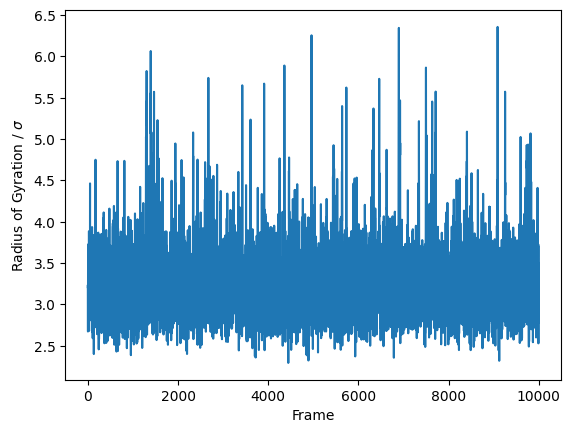

In [12]:
plt.plot(gyr.results.gyradii[0])
plt.xlabel('Frame')
plt.ylabel(f'Radius of Gyration / $\sigma$')
# plt.xlim(0,2000)
plt.savefig('../data/'+tag+'/gyr.pdf')

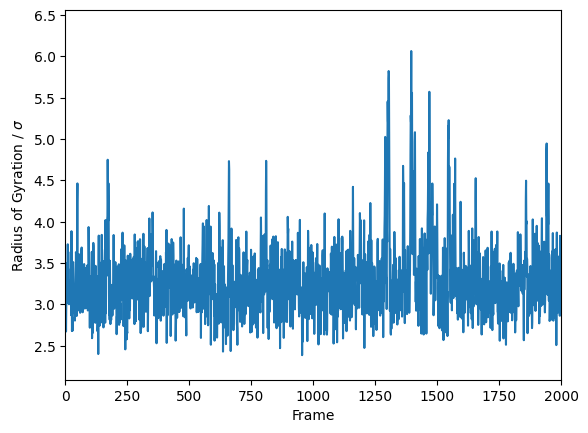

In [13]:
plt.plot(gyr.results.gyradii[0])
plt.xlabel('Frame')
plt.ylabel(f'Radius of Gyration / $\sigma$')
plt.xlim(0,2000)
plt.savefig('../data/'+tag+'/gyr.pdf')

# End-to-end Vector

In [ ]:
e2e = EndToEndVector(ag,n_chains=1,n_monomers=40, unwrap=True)

/home/kfu/.local/lib/python3.10/site-packages/MDAnalysis/coordinates/base.py:725: UserWarning: Reader has no dt information, set to 1.0 ps
  return self.ts.dt


In [ ]:
e2e.run(start=1000)
e2e.save('../data/'+tag+'/e2e')

/home/kfu/.local/lib/python3.10/site-packages/MDAnalysis/coordinates/LAMMPS.py:598: UserWarning: Reader has no dt information, set to 1.0 ps
  ts.data['time'] = step_num * ts.dt
100%|██████████| 10001/10001 [00:01<00:00, 6703.39it/s]
1it [00:00, 684.45it/s]


In [ ]:
abs_e2e = np.zeros(len(e2e._e2e))

for i in range(len(e2e._e2e)):
    abs_e2e[i] = np.linalg.norm(e2e._e2e[i])

abs_e2e

array([11.37302373, 12.22581104, 11.74046475, ..., 10.44642166,
       11.09361762,  8.23964467])

In [ ]:
plt.plot(e2e.results.times,abs_e2e)
plt.xlabel('Frame')
plt.ylabel('End-to-End Distance / $\sigma$')
plt.xlim(0,2000)
plt.savefig('../data/'+tag+'/e2e.pdf')

AttributeError: 'Results' object has no attribute 'times'

In [ ]:
plt.semilogx(e2e.results.times,e2e.results.acf[0][0])
plt.xlabel('Frame')
plt.ylabel(r'$ \rho_{e2e}(t)$')   
plt.xlim(0,3000)

AttributeError: 'Results' object has no attribute 'times'